# Salient Object Detection Demo
## Dataset Preparation + Model Testing

In [ ]:
# Cell 1: Import libraries
import os
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from data_loader import SODDataset, BasicAugmentations
from sod_model import SODModel

print('Libraries imported!')
images_path = 'images/'
masks_path = 'ground_truth_mask/'
images_list = sorted(os.listdir(images_path))
masks_list = sorted(os.listdir(masks_path))
print(f'Images: {len(images_list)}, Masks: {len(masks_list)}')

Libraries imported!
Images: 1000, Masks: 1000


## Load Model

In [ ]:
# Cell 2: Load trained model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

model = SODModel(use_improvements=False)
checkpoint = torch.load('best_model_baseline.pth', map_location=device)
model.load_state_dict(checkpoint['model_state_dict'])
model = model.to(device)
model.eval()

print(f'Model loaded!')
print(f'Val IoU: {checkpoint["val_iou"]:.4f}')
print(f'Parameters: {model.count_parameters():,}')

Device: cpu
Model loaded!
Val IoU: 0.4782
Parameters: 1,542,673


## Test Single Image

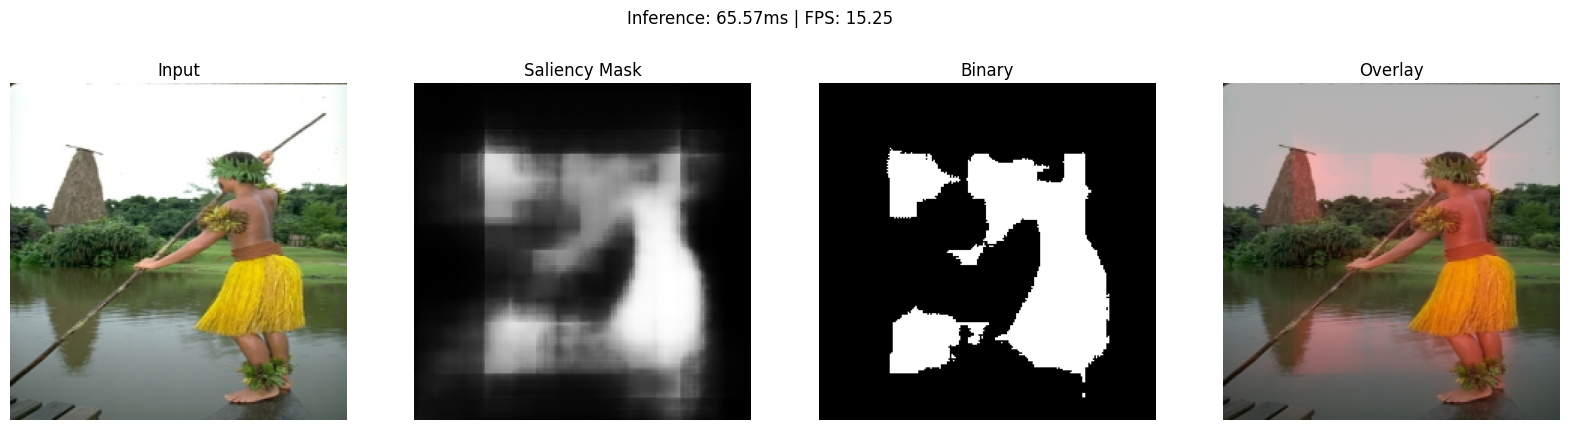

Inference: 65.57ms


In [ ]:
# Cell 3: Test prediction
test_img = 'images/0001.jpg'
img = cv2.imread(test_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
orig = img.copy()
img = cv2.resize(img, (224, 224)).astype(np.float32) / 255.0
img_t = torch.tensor(img).permute(2, 0, 1).unsqueeze(0).to(device)

start = time.time()
with torch.no_grad():
    pred = model(img_t)
inf_time = time.time() - start
pred = pred.squeeze().cpu().numpy()

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes[0].imshow(cv2.resize(orig, (224, 224)))
axes[0].set_title('Input')
axes[0].axis('off')

axes[1].imshow(pred, cmap='gray')
axes[1].set_title('Saliency Mask')
axes[1].axis('off')

axes[2].imshow((pred > 0.5).astype(np.float32), cmap='gray')
axes[2].set_title('Binary')
axes[2].axis('off')

overlay = img.copy()
mask_col = np.zeros_like(overlay)
mask_col[:, :, 0] = pred
overlay = np.clip(overlay * 0.7 + mask_col * 0.3, 0, 1)
axes[3].imshow(overlay)
axes[3].set_title('Overlay')
axes[3].axis('off')

plt.suptitle(f'Inference: {inf_time*1000:.2f}ms | FPS: {1/inf_time:.2f}')
plt.show()
print(f'Inference: {inf_time*1000:.2f}ms')

## Simple Demo - Change Image Path

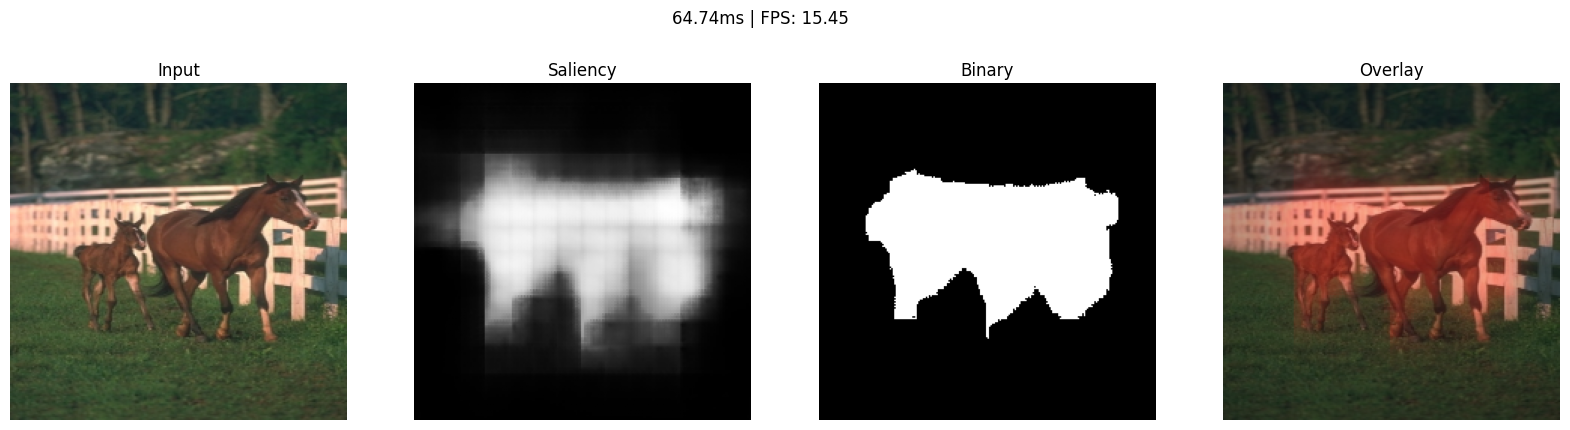

In [ ]:
# Cell 4: Test any image - CHANGE PATH HERE
test_img = 'images/0005.jpg'  # CHANGE THIS

img = cv2.imread(test_img)
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    orig = img.copy()
    img = cv2.resize(img, (224, 224)).astype(np.float32) / 255.0
    img_t = torch.tensor(img).permute(2, 0, 1).unsqueeze(0).to(device)
    
    start = time.time()
    with torch.no_grad():
        pred = model(img_t)
    inf_time = time.time() - start
    pred = pred.squeeze().cpu().numpy()
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(cv2.resize(orig, (224, 224)))
    axes[0].set_title('Input')
    axes[0].axis('off')
    axes[1].imshow(pred, cmap='gray')
    axes[1].set_title('Saliency')
    axes[1].axis('off')
    axes[2].imshow((pred > 0.5).astype(np.float32), cmap='gray')
    axes[2].set_title('Binary')
    axes[2].axis('off')
    overlay = img.copy()
    mask_col = np.zeros_like(overlay)
    mask_col[:, :, 0] = pred
    overlay = np.clip(overlay * 0.7 + mask_col * 0.3, 0, 1)
    axes[3].imshow(overlay)
    axes[3].set_title('Overlay')
    axes[3].axis('off')
    plt.suptitle(f'{inf_time*1000:.2f}ms | FPS: {1/inf_time:.2f}')
    plt.show()
else:
    print(f'Error: {test_img} not found')

## Model Info

In [ ]:
# Cell 5: Model summary
print('MODEL INFORMATION')
print('='*70)
print(f'Model: Baseline CNN')
print(f'Parameters: {model.count_parameters():,}')
print(f'Device: {device}')
print(f'Val IoU: {checkpoint["val_iou"]:.4f}')
print('='*70)

MODEL INFORMATION
Model: Baseline CNN
Parameters: 1,542,673
Device: cpu
Val IoU: 0.4782
